# Project Alura Care 
Working and threating high dimensionality data <br>
The project consist in threating a high dimensionality dataframe (33 features) to create a model that can help predicting Cancer in patients

Loading important libraries

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

Loading dataset

In [375]:
data = pd.read_csv('data/exames.csv')
data.head(11)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.16250,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.17410,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.22100,0.4366,0.20750,NaN


Veryfing for NaN and treating/removing the data

In [376]:
print(f'There is total of {data.isnull().sum().sum()} NaN')

There is total of 419 NaN


In [377]:
data_1 = data.drop(columns= ['exame_33'])

Creating and splitting the data for the model

In [378]:
# seeding for replicable results
SEED = 123143
random.seed(SEED)

# spliting dataset into X and y for the model
X = data_1.drop(columns= ['id', 'diagnostico'])
y = data_1['diagnostico']

# splitting the model into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

Creating and fitting the model `RandomForest`

In [379]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# calculating the score (accuracy) of the model
print(f'Accuracy result of the RandomForest: {100*model.score(X_test, y_test):.2f}%')

Accuracy result of the RandomForest: 92.40%


Comparing with the `DummyModel` from sklearn

In [380]:
# seeding for replicable results
SEED = 123143
random.seed(SEED)

dummy_model = DummyClassifier(strategy= 'most_frequent')
dummy_model.fit(X_train, y_train)

# calculating the score (accuracy) of the model
print(f'Accuracy result of the DummyModel: {100*dummy_model.score(X_test, y_test):.2f}%')

Accuracy result of the DummyModel: 66.67%


As the result of the `RandomForest` is actually better, we will use it as a baseline and begin the EDA (Exploratory Data Analysis) to remove unnecessary features

## Visualizing the Data

In [381]:
X.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [382]:
# concat the data of X and y
plot_data = pd.concat([y, X.iloc[:,0:10]], axis = 1 )

# using melt function to go from wide format to long format df
plot_data = plot_data.melt(id_vars= 'diagnostico', var_name= 'exames', value_name= 'valores' )

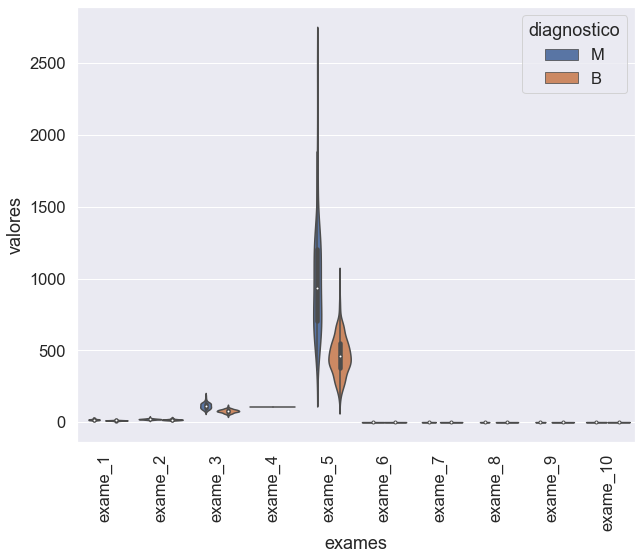

In [383]:
# plotting the data
plt.figure(figsize=(10, 8))
sns.violinplot(x= 'exames', y= 'valores', data= plot_data , hue = 'diagnostico')
plt.xticks(rotation = 90)
plt.show()

We will use the `StandardScaler`from sklearn to reescale de y axis

In [384]:
standarizer = StandardScaler()
standarizer.fit(X)
X_scaled = standarizer.transform(X)

# transforming into DF since we cannot concat with arrays
X_scaled = pd.DataFrame(data = X_scaled, columns = X.keys())

# concat the data of X and y again with rescaled values (up to 10 exams)
plot_data = pd.concat([y, X_scaled.iloc[:,0:10]], axis = 1 )

# using melt function to go from wide format to long format df
plot_data = plot_data.melt(id_vars= 'diagnostico', var_name= 'exames', value_name= 'valores' )

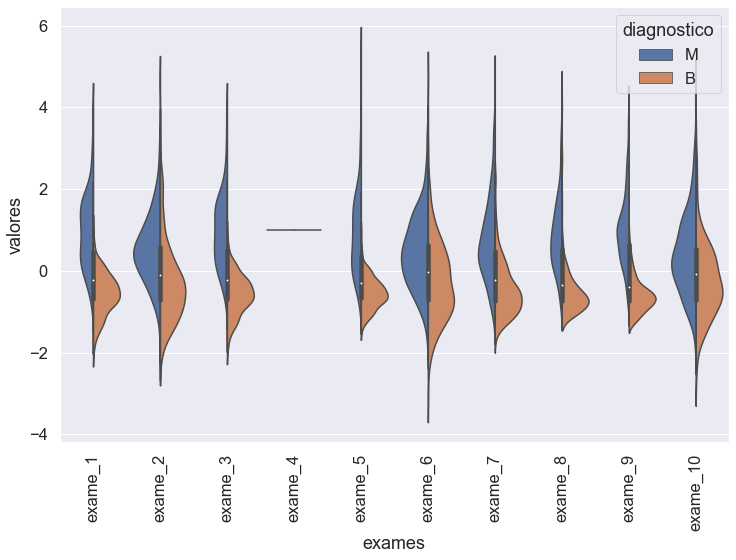

In [385]:
# plotting the data
plt.figure(figsize=(12, 8))
sns.violinplot(x= 'exames', y= 'valores', data= plot_data , hue = 'diagnostico', split=True)
plt.xticks(rotation = 90)
plt.show()

In [386]:
# having a look at 'exame_4'
X_scaled['exame_4']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

In [387]:
def violin_plot(values, start, end):
    plot_data = pd.concat([y, values.iloc[:,start:end]], axis = 1 )
    plot_data = pd.melt(plot_data, id_vars= 'diagnostico', var_name= 'exames', value_name= 'valores' )
    plt.figure(figsize=(12, 8))
    sns.violinplot(x= 'exames', y= 'valores', data= plot_data , hue = 'diagnostico', split=True)
    plt.xticks(rotation = 90)
    plt.show()

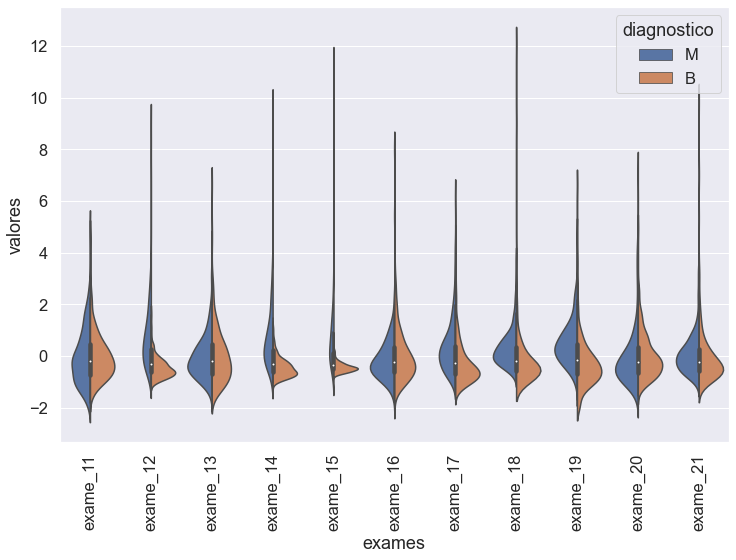

In [388]:
# plotting from (11 to 21)
violin_plot(X_scaled, 10, 21)

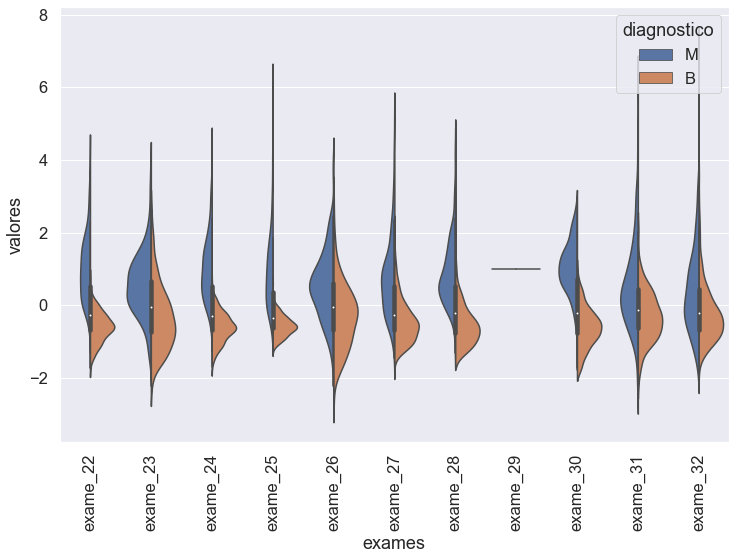

In [389]:
# plotting from (21 to 32)
violin_plot(X_scaled, 21, 32)

We can start by dropping off those `exames` with constant values

In [390]:
X_scaled2 = X_scaled.drop(columns= ['exame_29', 'exame_4'])

In [391]:
def classify(X):
    SEED= 1234
    random.seed(SEED)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    print(f'Accuracy result of the RandomForest: {100*model.score(X_test, y_test):.2f}%')

In [392]:
classify(X_scaled2)

Accuracy result of the RandomForest: 92.98%


We reduced 2 columns of the original DF (less data to gather is always a good situation) and had a little accuracy increase in the model

## Calculating the Correlation of the features

<AxesSubplot:>

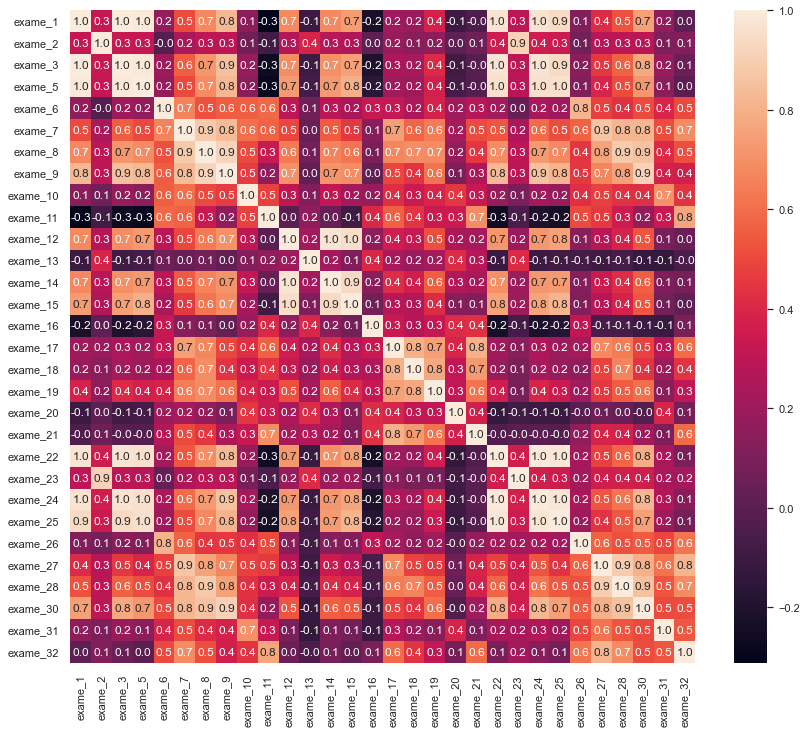

In [413]:
corr_matrix = X_scaled2.corr()
plt.figure(figsize=(14, 12))
sns.set(font_scale= 1)
sns.heatmap(corr_matrix, annot=True, fmt = ".1f")

In [394]:
# discovering and excluding high corr variables
corr_matrix_1 = corr_matrix[corr_matrix > 0.99].sum()
corr_matrix_2 = corr_matrix_1[corr_matrix_1>1]
corr_matrix_2.keys()

Index(['exame_1', 'exame_3', 'exame_22', 'exame_24'], dtype='object')

In [395]:
# dropping a few highly corr the columns from the X dataset
X_scaled3 = X_scaled2.drop(columns = ['exame_3', "exame_24"])
X_scaled3

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [396]:
classify(X_scaled3)

Accuracy result of the RandomForest: 92.98%


Two more features were excluded from the dataset and the result of the model stood the same

## Selecting K_best features for the model

Here we use the `SelectKbest` from _sklearn_ to generate a score for "K" of our features in the X dataset in order to check which are the most representatives ones for our model.
The function to generate this score is the `chi2`

In [397]:
# seeding random
SEED = 1234
random.seed(SEED)

# Necessary imports
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting 5 top features
feature_selection = SelectKBest(chi2, k = 5)

# adjusting X (must use dataset with only non-negative for chi2)
X_1 = X.drop(columns= (['exame_4', 'exame_29', 'exame_3', 'exame_24']))

# splitting the model into train and test
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size= 0.3)

# fiting the model to select the best features
kbest_fit = feature_selection.fit(X_train, y_train)

# training and testing best features (5 out of 31)
kbest_train = kbest_fit.transform(X_train)
kbest_test =  kbest_fit.transform(X_test)

# training the RandomForest with new kbest features
model_kbest = RandomForestClassifier(n_estimators=100, random_state=1234)
model_kbest.fit(kbest_train, y_train)

# calculating the score (accuracy) of the model with 5 features
print(f'Accuracy result of the RandomForest with k_best ({kbest_test.shape[1]} features): {100*model_kbest.score(kbest_test, y_test):.2f}%')

# calculating the score (accuracy) of the model with 28 features
classify(X_scaled3)

print(f'Achieved similar results with about {kbest_test.shape[1]/X_scaled3.shape[1]*100:.2f}% of original dataset quantity of features in X')

Accuracy result of the RandomForest with k_best (5 features): 92.40%
Accuracy result of the RandomForest: 92.98%
Achieved similar results with about 17.86% of original dataset quantity of features in X


## Confusion Matrix with SKLearn

In [398]:
from sklearn.metrics import confusion_matrix

[Text(0.5, 23.4, 'Predicted Value'), Text(41.4, 0.5, 'Real')]

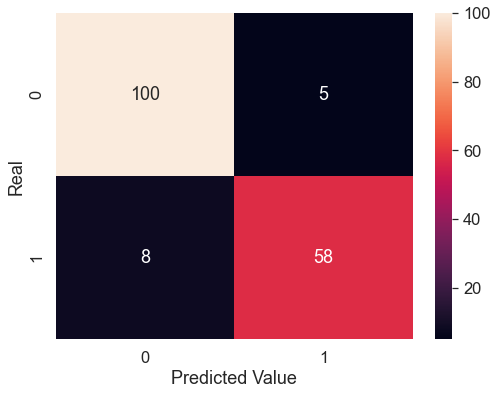

In [399]:
conf_matrix = confusion_matrix(teste_y, model_kbest.predict(kbest_test))
plt.figure(figsize=(8 ,6))
sns.set(font_scale= 1.5)
sns.heatmap(conf_matrix, annot=True, fmt = "d").set(xlabel= 'Predicted Value', ylabel= 'Real')


> Key Idea of Confusion Matrix with k_best
<br>
- Out of 105 0's in the test dataset, the model predicted 100 correctly, and 5 incorrectly
- Out of 66 1's in the test dataset, the model predicted 58 correctly, and 8 incorrectly

## Recursive Feature Elimination (RFE)

Similar to `SelectKbest`, the RFE is used to score the features in the X dataset, and recursively eliminte the lowest ones

In [400]:
from sklearn.feature_selection import RFE

Accuracy result of the RandomForest with RFE: 90.06%


[Text(0.5, 23.4, 'Predicted Value'), Text(41.4, 0.5, 'Real')]

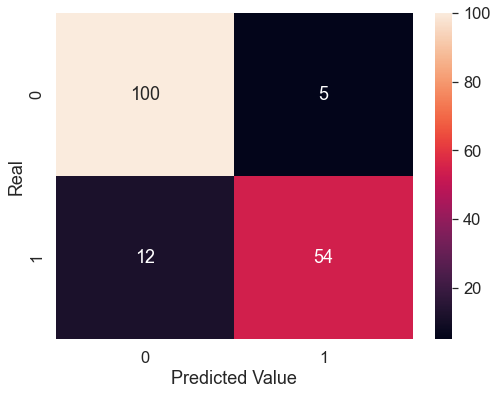

In [401]:
SEED= 1234
random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size= 0.3)
model = RandomForestClassifier(n_estimators=100, random_state=SEED)
model.fit(X_train, y_train)

feature_selection_rfe = RFE(estimator= model , n_features_to_select= 5 ,step= 1)
feature_selection_rfe.fit(X_train, y_train)

# new X dataset with selected features from RFE
X_train_RFE = feature_selection_rfe.transform(X_train)
X_test_RFE = feature_selection_rfe.transform(X_test)
model.fit(X_train_RFE, y_train)

# calculating the score (accuracy) of the model with 5 features
print(f'Accuracy result of the RandomForest with RFE: {100*model.score(X_test_RFE, y_test):.2f}%')

# plotting confusion matrix for the new model with the X RFE dataset
conf_matrix = confusion_matrix(teste_y, model.predict(X_test_RFE))
plt.figure(figsize=(8 ,6))
sns.set(font_scale= 1.5)
sns.heatmap(conf_matrix, annot=True, fmt = "d").set(xlabel= 'Predicted Value', ylabel= 'Real')

> Key Idea of Confusion Matrix with RFE
<br>
- Out of 105 0's in the test dataset, the model predicted 100 correctly, and 5 incorrectly
- Out of 66 1's in the test dataset, the model predicted 58 correctly, and 12 incorrectly

## RFECV (Cross validation)

In [402]:
from sklearn.feature_selection import RFECV

Accuracy result of the RandomForest with RFE: 92.98%


[Text(0.5, 23.4, 'Predicted Value'), Text(41.4, 0.5, 'Real')]

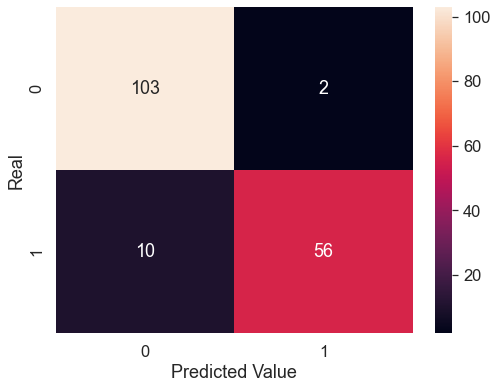

In [403]:
SEED= 1234
random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size= 0.3)
model = RandomForestClassifier(n_estimators=100, random_state=SEED)
model.fit(X_train, y_train)

feature_selection_rfecv = RFECV(estimator= model, cv= 5 ,step= 1, scoring= 'accuracy')
feature_selection_rfecv.fit(X_train, y_train)

# new X dataset with selected features from RFE
X_train_RFECV = feature_selection_rfecv.transform(X_train)
X_test_RFECV = feature_selection_rfecv.transform(X_test)
model.fit(X_train_RFECV, y_train)

# calculating the score (accuracy) of the model with 5 features
print(f'Accuracy result of the RandomForest with RFE: {100*model.score(X_test_RFECV, y_test):.2f}%')

# plotting confusion matrix for the new model with the X RFE dataset
conf_matrix = confusion_matrix(teste_y, model.predict(X_test_RFECV))
plt.figure(figsize=(8 ,6))
sns.set(font_scale= 1.5)
sns.heatmap(conf_matrix, annot=True, fmt = "d").set(xlabel= 'Predicted Value', ylabel= 'Real')

checking how many features the model has selected, and which ones are important

In [404]:
# number of features
print(f'Number of features selected by RFECV: {feature_selection_rfecv.n_features_}')

Number of features selected by RFECV: 26


In [405]:
# which features the model selected
X_1.columns[feature_selection_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [406]:
feature_selection_rfecv.grid_scores_

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

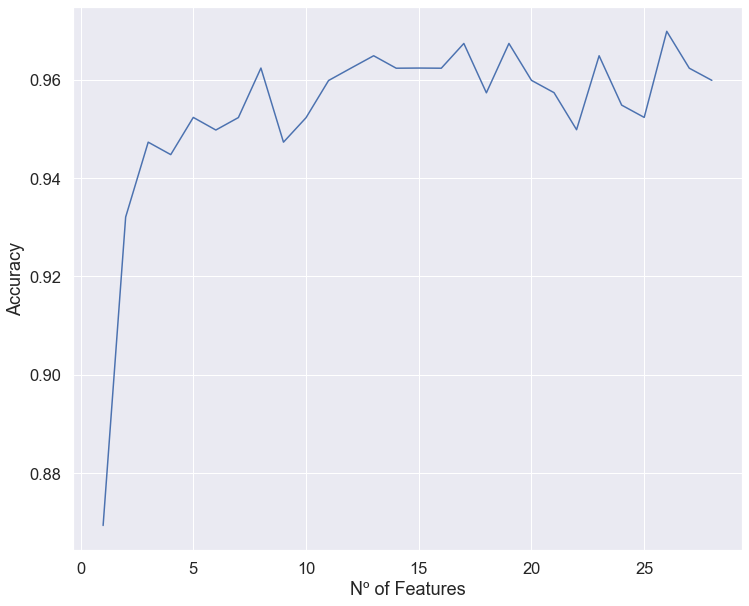

In [407]:
# plotting the accuracy of the model acording to the number of features
plt.figure(figsize=(12 ,10))
plt.xlabel('Nº of Features')
plt.ylabel('Accuracy')
plt.plot(range(1, len(feature_selection_rfecv.grid_scores_)+1), selecionador_rfecv.grid_scores_)

<AxesSubplot:>

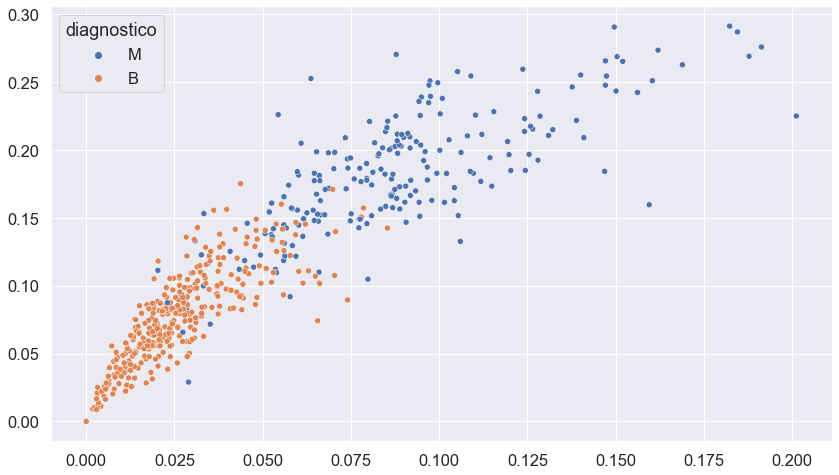

In [408]:
# plotting an scatterplot with 2 features using RFE (not advised)
# in the next example we will use PCA and TSNE to compare the results

feature_selection_rfe = RFE(estimator= model , n_features_to_select= 2 ,step= 1)
feature_selection_rfe.fit(X_train, y_train)
X_2 = feature_selection_rfe.transform(X_1)
plt.figure(figsize=(14,8))
sns.scatterplot(x= X_2[:,0], y= X_2[:,1], hue = y)

## Using other methods do reduce dimensionality (PCA and TSNE)

For visualizing data on a plot, its better to use tools like `PCA` and `TSNE` to transform the available features than to just drop them out by using `RFE` or `Kbest` 

In [409]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

<AxesSubplot:>

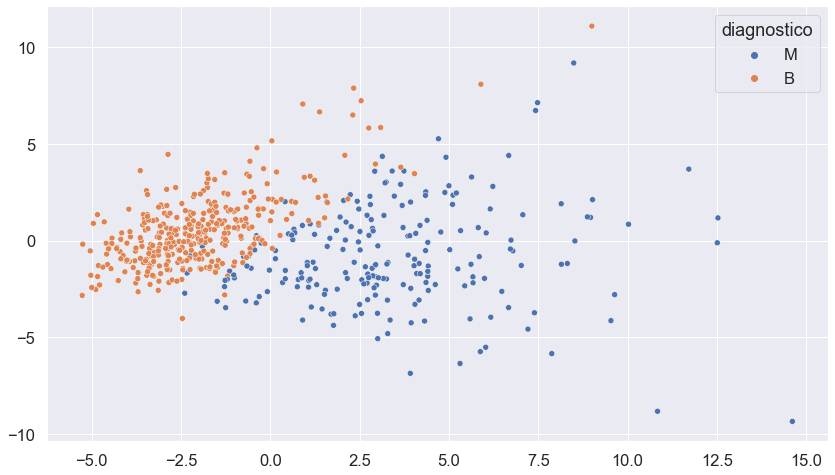

In [410]:
# Using PCA to plot the scaled data
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_scaled3)
plt.figure(figsize=(14,8))
sns.scatterplot(x= X_pca[:,0], y= X_pca[:,1], hue = y)

<AxesSubplot:>

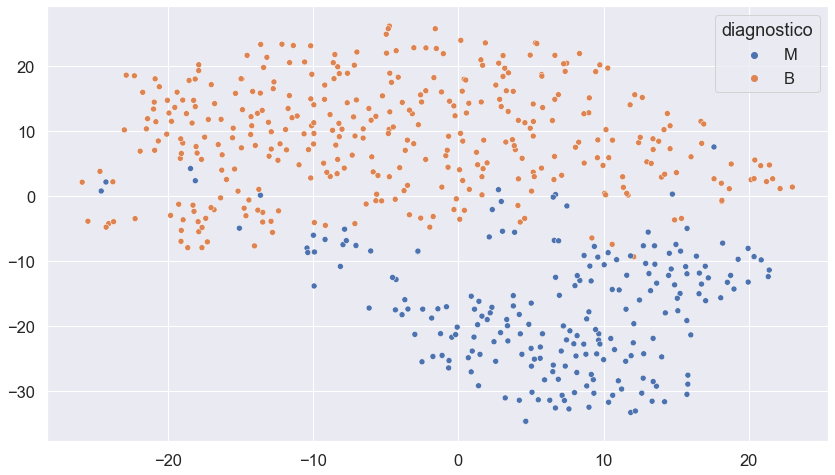

In [411]:
# Using TSNE to plot the scaled data
tsne = TSNE(n_components= 2)
X_tsne = tsne.fit_transform(X_scaled3)
plt.figure(figsize=(14,8))
sns.scatterplot(x= X_tsne[:,0], y= X_tsne[:,1], hue = y)